In [ ]:
!pip install -U portalocker>=2.0.0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Transformations --> Took reference from the Demo
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize data to range [-1, 1]
])

# Loading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Training and Testing loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 147195148.38it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25262918.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40290188.27it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21333178.91it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Mapping the labels for the MNIST dataset
labels_map = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4",
    5: "5", 6: "6", 7: "7", 8: "8", 9: "9"
}

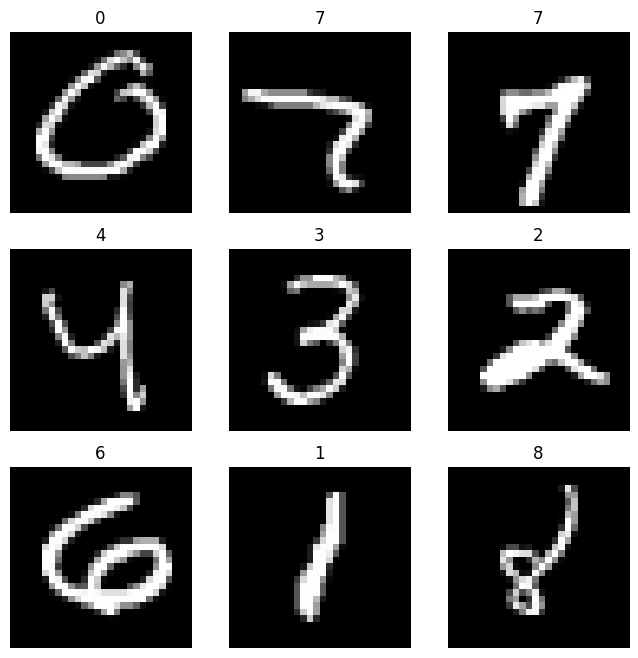

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Displaying figures from the dataset randomly
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Model building

In [ ]:
#Defining NN architecure - MLP- Multi-layer Perceptron
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) ## First fully connected linear layer, 28*28 I/P features and 128 O/P features
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10) ## 10 o/p features because MNIST has 10 O/P features

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x)) ## Applying relu activation for the first layer
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initializing the neural network
model = MLP()

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.027766463458538
Epoch 1, Batch 200, Loss: 0.42261952549219134
Epoch 1, Batch 300, Loss: 0.36632166340947153
Epoch 1, Batch 400, Loss: 0.3557272307574749
Epoch 1, Batch 500, Loss: 0.32772814996540545
Epoch 1, Batch 600, Loss: 0.29438870944082735
Epoch 1, Batch 700, Loss: 0.2688548056781292
Epoch 1, Batch 800, Loss: 0.27697311133146285
Epoch 1, Batch 900, Loss: 0.2461575023829937
Epoch 2, Batch 100, Loss: 0.2318267051130533
Epoch 2, Batch 200, Loss: 0.1971542874723673
Epoch 2, Batch 300, Loss: 0.20060538444668055
Epoch 2, Batch 400, Loss: 0.18731677621603013
Epoch 2, Batch 500, Loss: 0.1862528335303068
Epoch 2, Batch 600, Loss: 0.18688635274767876
Epoch 2, Batch 700, Loss: 0.19139392241835596
Epoch 2, Batch 800, Loss: 0.16494716588407754
Epoch 2, Batch 900, Loss: 0.16701194643974304
Epoch 3, Batch 100, Loss: 0.14217018101364373
Epoch 3, Batch 200, Loss: 0.1357156409882009
Epoch 3, Batch 300, Loss: 0.14191300103440882
Epoch 3, Batch 400, Loss: 0.133173158708959

In [ ]:
# Evaluating the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9676%


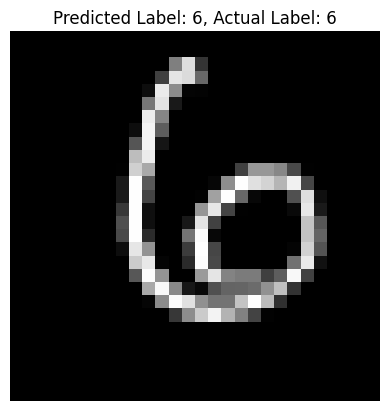

In [ ]:
# Evaluating the Model by printing a random image and checking whether it correctly labelled or not
image_index = 100
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


### Step 4:

### Hypothesis:
Adding an additional dense layer will likely increase the model's ability to capture the latent and intricate details peresent in the data there by increasing the performance. But if there are more additional layers and the model is more complex there is a risk of overfitting, given the size of the dataset.

In [ ]:
# Defining the same neural network architecture but with one more layer
class MLP_2(nn.Module):
    def __init__(self):
        super(MLP_2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # Adding another layer
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model 2
model_2 = MLP_2()


In [ ]:
# loss function and optimizer are same
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)  # Use model_2 instead of model

# Training the modified neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_2.train()  # Ensure model_2 is in training mode
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_2(inputs)  # Use model_2 instead of model
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 1.076742314696312
Epoch 1, Batch 200, Loss: 0.4475471602380276
Epoch 1, Batch 300, Loss: 0.3799269212782383
Epoch 1, Batch 400, Loss: 0.34226983912289144
Epoch 1, Batch 500, Loss: 0.28865853302180766
Epoch 1, Batch 600, Loss: 0.2841735565662384
Epoch 1, Batch 700, Loss: 0.2699821048229933
Epoch 1, Batch 800, Loss: 0.24283235229551792
Epoch 1, Batch 900, Loss: 0.2421476786583662
Epoch 2, Batch 100, Loss: 0.20647274751216174
Epoch 2, Batch 200, Loss: 0.2019443818554282
Epoch 2, Batch 300, Loss: 0.19839715786278248
Epoch 2, Batch 400, Loss: 0.18704855311661958
Epoch 2, Batch 500, Loss: 0.1912871154025197
Epoch 2, Batch 600, Loss: 0.18548427280038596
Epoch 2, Batch 700, Loss: 0.16605669908225537
Epoch 2, Batch 800, Loss: 0.16753259748220445
Epoch 2, Batch 900, Loss: 0.17385751377791167
Epoch 3, Batch 100, Loss: 0.14374211695045233
Epoch 3, Batch 200, Loss: 0.13203632552176714
Epoch 3, Batch 300, Loss: 0.1296660495735705
Epoch 3, Batch 400, Loss: 0.1367923179268837

In [ ]:
# Evaluating the model
model_2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9662%


### Result:

The result is in support to the hypothesis. The model where I have added an extra layer, did show a slight improvement in the accuracy when compared to the precious model.

### Step 7
Experimenting with the model

<b>Hypothesis 1:</b>

Changing the optimizer to SGD, Increasing the learning rate to 0.01 may lead to faster learning during the training of the model.


In [ ]:
# Changing the optimizer for Model_2
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.01) # Increased learning rate to 0.01%

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


# Evaluating the model
model_2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Epoch 1, Batch 100, Loss: 0.06339370383415371
Epoch 1, Batch 200, Loss: 0.06208181254565716
Epoch 1, Batch 300, Loss: 0.047062768893083556
Epoch 1, Batch 400, Loss: 0.05031040196307004
Epoch 1, Batch 500, Loss: 0.04745570327155292
Epoch 1, Batch 600, Loss: 0.05178708768682554
Epoch 1, Batch 700, Loss: 0.0489665582543239
Epoch 1, Batch 800, Loss: 0.05437368585495278
Epoch 1, Batch 900, Loss: 0.0529392583318986
Epoch 2, Batch 100, Loss: 0.04382604194339365
Epoch 2, Batch 200, Loss: 0.055102688455954195
Epoch 2, Batch 300, Loss: 0.046025687910150735
Epoch 2, Batch 400, Loss: 0.03759412131737918
Epoch 2, Batch 500, Loss: 0.05094301956705749
Epoch 2, Batch 600, Loss: 0.053495346810668705
Epoch 2, Batch 700, Loss: 0.04265960224205628
Epoch 2, Batch 800, Loss: 0.03871196806896478
Epoch 2, Batch 900, Loss: 0.05338339628186077
Epoch 3, Batch 100, Loss: 0.04099106887355447
Epoch 3, Batch 200, Loss: 0.04021720333956182
Epoch 3, Batch 300, Loss: 0.04734326071571559
Epoch 3, Batch 400, Loss: 0.0367

### Result:

Accuracy increased than the previous model. The learning rate as I have thought in the hypothesis, increased and lead to a faster training and lead to a better performance of the model.

<b>Hypothesis 2:</b>

Using a different activation function in the model. By using different activation functions, I want to see thier effect on the performance of the model.


In [ ]:
class MLP_3(nn.Module):
    def __init__(self):
        super(MLP_3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Using sigmoid activation function for the second layer
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model_3
model_3 = MLP_3()



In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_3.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluating the model
model_3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Epoch 1, Batch 100, Loss: 1.4694708731770516
Epoch 1, Batch 200, Loss: 0.5532271987199784
Epoch 1, Batch 300, Loss: 0.4172725349664688
Epoch 1, Batch 400, Loss: 0.3224704061448574
Epoch 1, Batch 500, Loss: 0.2993147809803486
Epoch 1, Batch 600, Loss: 0.29385972194373605
Epoch 1, Batch 700, Loss: 0.2648950580507517
Epoch 1, Batch 800, Loss: 0.24012051679193974
Epoch 1, Batch 900, Loss: 0.2307078104838729
Epoch 2, Batch 100, Loss: 0.19984303176403045
Epoch 2, Batch 200, Loss: 0.17190765183418988
Epoch 2, Batch 300, Loss: 0.16417120456695555
Epoch 2, Batch 400, Loss: 0.18073924709111452
Epoch 2, Batch 500, Loss: 0.18270463116466998
Epoch 2, Batch 600, Loss: 0.17430584598332644
Epoch 2, Batch 700, Loss: 0.16245834382250904
Epoch 2, Batch 800, Loss: 0.15987214295193553
Epoch 2, Batch 900, Loss: 0.1543268659710884
Epoch 3, Batch 100, Loss: 0.12917786138132215
Epoch 3, Batch 200, Loss: 0.14223155837506055
Epoch 3, Batch 300, Loss: 0.12344783972948789
Epoch 3, Batch 400, Loss: 0.11540820408612

<b>Result:</b>
Model showed a good performance and by changing the activation function the accuracy neither improved nor deprived. So we can say that this is also a good combination to use.


<b>Hypothesis 3:</b>

Using a Dropout Layer with adjustable dropout rate just to check how it effects the performance of the model.

In [ ]:
class MLP_4(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(MLP_4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer with adjustable dropout rate
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # Applying dropout
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initializing model_4 with dropout rate of 0.5
model_4 = MLP_4(dropout_rate=0.5)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_4.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluating the model
model_4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')


Epoch 1, Batch 100, Loss: 1.4247095739841462
Epoch 1, Batch 200, Loss: 0.6364197665452958
Epoch 1, Batch 300, Loss: 0.4884757977724075
Epoch 1, Batch 400, Loss: 0.43475090578198433
Epoch 1, Batch 500, Loss: 0.4098598180711269
Epoch 1, Batch 600, Loss: 0.3718586927652359
Epoch 1, Batch 700, Loss: 0.32807513639330865
Epoch 1, Batch 800, Loss: 0.32316673986613753
Epoch 1, Batch 900, Loss: 0.30640654511749743
Epoch 2, Batch 100, Loss: 0.2576712003350258
Epoch 2, Batch 200, Loss: 0.2510404726117849
Epoch 2, Batch 300, Loss: 0.2546730499714613
Epoch 2, Batch 400, Loss: 0.24554114561527968
Epoch 2, Batch 500, Loss: 0.23934019446372987
Epoch 2, Batch 600, Loss: 0.2207339145988226
Epoch 2, Batch 700, Loss: 0.21583999544382096
Epoch 2, Batch 800, Loss: 0.21956197522580623
Epoch 2, Batch 900, Loss: 0.22323226053267717
Epoch 3, Batch 100, Loss: 0.18803455881774425
Epoch 3, Batch 200, Loss: 0.1969586317613721
Epoch 3, Batch 300, Loss: 0.19588945291936397
Epoch 3, Batch 400, Loss: 0.1861816007271409

<b>Result</b>
The accuracy did not change when compared with the previous models. It is in the same range, so by adding a dropout layer and using the same combination of layers does not impact the performance of the model.

<b>Hypothesis 4</b>

Changing the number of epochs

In [ ]:
class MLP_5(nn.Module):
    def __init__(self):
        super(MLP_5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initializing model_5
model_5 = MLP_5()



In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_5.parameters(), lr=0.001)

# Training the neural network
num_epochs = 15
for epoch in range(num_epochs):
    model_5.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluating the model
model_5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_5(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {correct / total}%')


Epoch 1, Batch 100, Loss: 1.1310789316892624
Epoch 1, Batch 200, Loss: 0.48800792306661606
Epoch 1, Batch 300, Loss: 0.40975818306207656
Epoch 1, Batch 400, Loss: 0.32280451729893683
Epoch 1, Batch 500, Loss: 0.31080727465450764
Epoch 1, Batch 600, Loss: 0.302058434933424
Epoch 1, Batch 700, Loss: 0.25768276520073413
Epoch 1, Batch 800, Loss: 0.2520501197502017
Epoch 1, Batch 900, Loss: 0.2356016906350851
Epoch 2, Batch 100, Loss: 0.22867143228650094
Epoch 2, Batch 200, Loss: 0.19990795232355596
Epoch 2, Batch 300, Loss: 0.19736208997666835
Epoch 2, Batch 400, Loss: 0.18952029017731548
Epoch 2, Batch 500, Loss: 0.16513678643852472
Epoch 2, Batch 600, Loss: 0.17391017835587264
Epoch 2, Batch 700, Loss: 0.1533302374370396
Epoch 2, Batch 800, Loss: 0.17202186483889817
Epoch 2, Batch 900, Loss: 0.15947617204859854
Epoch 3, Batch 100, Loss: 0.12996052405796946
Epoch 3, Batch 200, Loss: 0.13731842467561364
Epoch 3, Batch 300, Loss: 0.14077948115766048
Epoch 3, Batch 400, Loss: 0.135488791149

**Result:**
By Increasing the number of epochs the accuracy increased a bit from the previous model, but it falls under the same range, so increasing of epochs also does not have much impact on the model.

The combination which we used in the model_2 is the best one. The model's performance is improved by adding a dense layer.





### GitHub Link

https://github.com/sweekruthi-balivada/Deep-Learning
